<a href="https://colab.research.google.com/github/fatmacodesart/MachineLearning_models/blob/main/AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Denoising using AE (Autoencoder)**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [31]:
input_layer = Input(shape=(28, 28, 1))
encoder = Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(input_layer)
encoder = Conv2D(8, (3, 3), activation='relu', padding='same', strides=2, name="encoder")(encoder)

encoder_model = tf.keras.Model(input_layer, encoder, name="encoder")

# decoder
decoder = Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same')(encoder)
decoder = Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same')(decoder)
decoder = Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same', name="decoder")(decoder)

decoder_model = tf.keras.Model(encoder, decoder, name="decoder")

autoencoder = tf.keras.Model(input_layer, decoder , name="autoencoder")

In [32]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [34]:
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - loss: 0.0126 - val_loss: 0.0067
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - loss: 0.0061 - val_loss: 0.0044
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 30ms/step - loss: 0.0028 - val_loss: 0.0028


In [35]:
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Conv2D)                     │ (None, 7, 7, 8)             │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_14                  │ (None, 14, 14, 8)           │             584 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_15                  │ (None, 28, 28, 16)          │           1,168 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Conv2D)                     │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,653 (37.71 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,436 (25.14 KB)

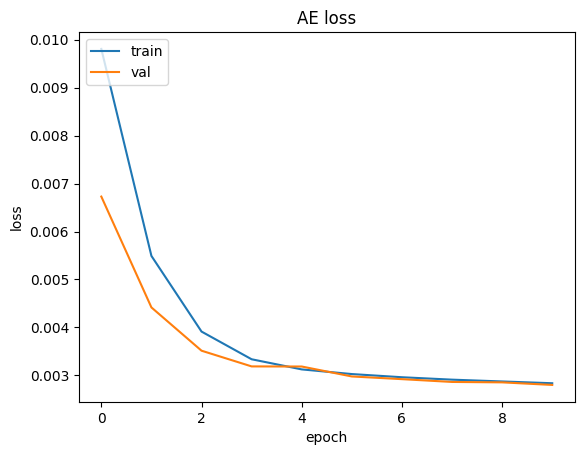

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('AE loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
encoded_imgs = encoder_model(x_test).numpy()
decoded_imgs = decoder_model(encoded_imgs).numpy()

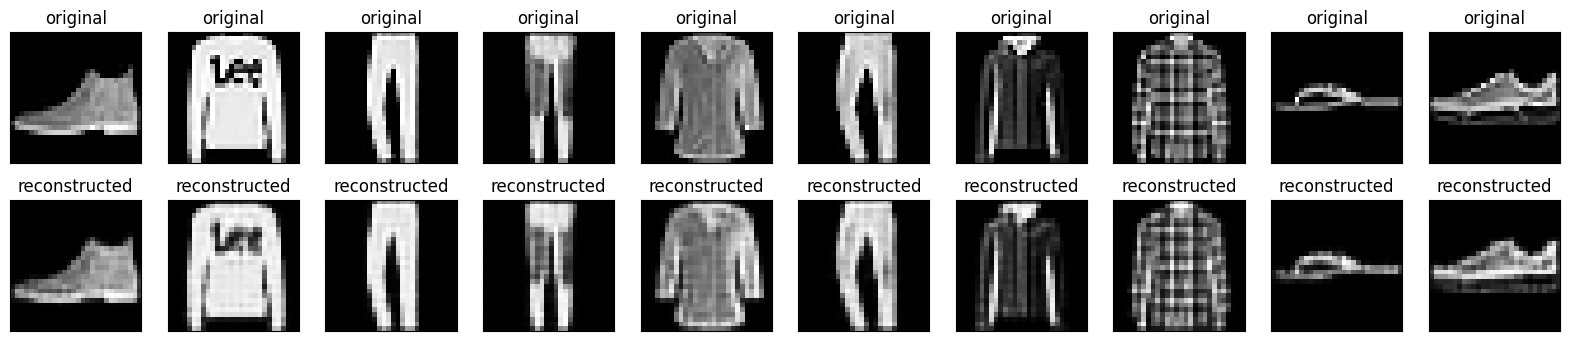

In [41]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
